 # Recurrent Neural Network

# Part 1 - Data Preprocessing¶

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Traing Set 
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
# Initialising the RNN¶
regressor = Sequential()

In [19]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [20]:
# SECOND LAYER
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
# THIRD LAYER
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
# Adding the output layer\
regressor.add(Dense(units = 1))

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 44, batch_size = 32)

Epoch 1/44


2022-12-12 14:43:53.907783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:43:54.120847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:43:54.187273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:43:54.255265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:43:54.323745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:43:54.410015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:43:54.531444: I tensorflow/core/grappler/optimizers/cust

 2/38 [>.............................] - ETA: 1s - loss: 0.3209  

2022-12-12 14:43:54.767829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 4s 60ms/step - loss: 0.0415
Epoch 2/44
38/38 [==============================] - 2s 45ms/step - loss: 0.0045
Epoch 3/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0033
Epoch 4/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0024
Epoch 5/44
38/38 [==============================] - 2s 47ms/step - loss: 0.0023
Epoch 6/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0020
Epoch 7/44
38/38 [==============================] - 2s 47ms/step - loss: 0.0019
Epoch 8/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0018
Epoch 9/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0017
Epoch 10/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0017
Epoch 11/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0016
Epoch 12/44
38/38 [==============================] - 2s 46ms/step - loss: 0.0016
Epoch 13/44
38/38 [=============================

# Part 3 - Making the predictions and visualising the results

In [26]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/var/folders/zp/7qktvyk137s1mql4gxlf81s40000gn/T/ipykernel_2101/4000627586.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
2022-12-12 14:45:42.074002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:45:42.146098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:45:42.214926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 623ms/step


2022-12-12 14:45:42.286279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 14:45:42.350949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


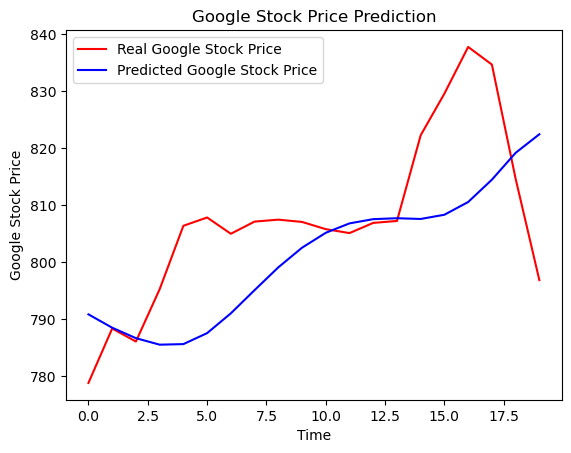

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()